# <span style="color:SteelBlue">Lesson:</span> Building an ML Pipeline</h1>
<hr>
We've talked about the process of training a model already which is a failry straight forward process when were talking about a single model, with predefined HyperParameters.

However, in most real life situations we DO NOT know what models may be the best suited for the task at hand, let alone the appropriate hyperparameters for each model. 

**The Solution?**

We will write a series of loops that use *Cross-Validation* to "test" each model, including every combination of relevant hyperparameters —for each model, in order to discern which configuration is the most effective.

**Relevant topics for this section on Building Pipelines:**
1. Dictionaries
2. Looping

<hr>

<br>

## 1. Imports

### Import PyData Libraries

In [84]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('max_columns',None)
pd.set_option('max_rows', None)

# Matplotlib for visualization
import matplotlib.pyplot as plt

# Seaborn for easier visualization
import seaborn as sns

# Pickle for saving model files
import pickle

### Import SKLearn Classifiers

In [2]:
# Import Logistic Regression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier and GradientBoostingClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from sklearn.neighbors import KNeighborsClassifier

### Import Libraries to make Pipeline

In [3]:
# import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# import make_pipeline from sklearn.pipeline
from sklearn.pipeline import make_pipeline

# import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# import GridSearchCV from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

# import roc_curve and auc from sklearn.metrics
from sklearn.metrics import roc_curve, auc

<hr>
<br>

## 2. Load Data

### `read_csv`

In [4]:
# your code here!

In [5]:
df = pd.read_csv('./pima_indian_diabetes/data/pima_diabetes.csv')

### `.shape`

In [6]:
# your code here!

In [7]:
df.shape

(768, 9)

### `.head()`

In [8]:
# Your code here!

In [9]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

<hr>
<br>

## 3. Initial Data Split

### Split Dataset into `X` and `y` sets

In [10]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

### `shape` of `X`

In [11]:
# your code here!

In [12]:
X.shape

(768, 8)

### `shape` of `y`

In [13]:
# your code here

In [14]:
y.shape

(768,)

### Split `X` and `y` into Train and Test Sets

**We want to split both the `X` and `y` datasets into Train and Test sets. This will result in 4 datasets total.**

```(X_train, X_test, y_train, y_test)```

> **`X`:** `X_train` and `X_test`

> **`y`:** `y_train` and `y_test`

The **Train Set** is the set that we will operform further splits on, during the cross-validation step. The motivation for this is to find the best combination of model and hyperparameters, which we can only achieve by running performance metrics on every possible combination of Model and Hyperparameters.

The **Test Set** will remain untouched until after the cross-validation step.

### `train_test_split()`

you will pass in the following values to `train_test_split`
```python 
X
y
test_size = 0.2, 
stratify = df['Outcome'], 
random_state = 123
```

In [15]:
# your code here

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify = df['Outcome'], 
    random_state = 123)

### `print` length of `X_train` and `X_test`

In [17]:
# your code here

In [18]:
print("X_train:", len(X_train)) 
print("X_test:", len(X_test))

X_train: 614
X_test: 154


### `print` length of `y_train` and `y_test`

In [19]:
# your code here

In [20]:
print("y_train:", len(y_train)) 
print("y_test:", len(y_test))

y_train: 614
y_test: 154


Both **Train** sets, **X_train and y_train**, should have the **same number of rows**

Both **Test** sets, **X_test and y_test**, should also have the **same number of rows**.

<hr>
<br>

## 4. Build Pipeline Dictionary

The pipeline dictionary can contain as many models as your heart's content. We use this approach to automate the process of fitting a model, predicting labels, and finally testing model accuracy.

This will all be done with the SKlearn model_selection function **GridSearchCV()** which expects at least two arguments a **Pipeline** dictionary and a **Hyperparameters** dictionary, with matching keys!!!

In [21]:
pipeline_dict = {
    "l1" : make_pipeline(LogisticRegression(penalty="l1", random_state = 123)),
    "l2" : make_pipeline(LogisticRegression(penalty="l2", random_state = 123)),
    "rf" : make_pipeline(RandomForestClassifier(random_state = 123)),
    "gb" : make_pipeline(GradientBoostingClassifier(random_state = 123)),
    "kn" : make_pipeline(KNeighborsClassifier())
}

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

## <span style="color:RoyalBlue">Exercise 1</span> - Dictionary Loop

Loop through pipeline dict to print out the type of object that is associated with every model "key."

Remember dictionaries are set up like:
```python 
some_dict = {
    key1 : val1
    key2 : val2
}```


**Hint:** I want you to **print every key** and the **type of every matching value**

In [22]:
#Do work here so you don't erase the answer!

In [23]:
for key, val in pipeline_dict.items():
    print(key + ":", type(val))
    
# Your code should output this!

l1: <class 'sklearn.pipeline.Pipeline'>
l2: <class 'sklearn.pipeline.Pipeline'>
rf: <class 'sklearn.pipeline.Pipeline'>
gb: <class 'sklearn.pipeline.Pipeline'>
kn: <class 'sklearn.pipeline.Pipeline'>


<hr>
<br>

## 5. Build a Hyperparameters Nested-Dictionary

The following describes the goal for this section, however we will begin with some exercises to help understand the concept of a nested dictionary!

**The Final Hyperparameter Dictionary: `hp_dict`**

> Every `key` in `hp_dict` will match the keys from `pipeline_dict`.

> Every `value` in `hp_dict` will be a dictionary.

**Nested Dictionaries inside `hp_dict`**

> Every `key` in each nested `dict` will be a different hyperparameter that needs tuning.

> Every `value` will hold a range of values that each particular hyperparameter can take on.

**Example of an `hp_dict` with values for 2 different models**

*Notice that the `values` of `hp_dict` are surrounded by `{}`, this means that they are themselves dictionaries!*
```python 
hp_dict = {
    'kn':{"kneighborsclassifier__n_neighbors" : np.arange(1,11)}
    'l1':{"logisticregression__C" : np.linspace(1e-4, 1e4, 10)}
}```

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

## <span style="color:RoyalBlue">Exercise 2</span> - Performing Action during Loop

**Loop through `pipeline_dict` to print out the `type` of object that is associated with the `get_params()` method, for every model "key."**

**Remember:** Dictionaries in Python are set up like this:
```python 
some_dict = {
    key1 : val1
    key2 : val2
}```


**Hint:** I want you to **`print` every `key`** and the **`type` of object that results from calling the `get_params()` method on every matching `value`**

In [24]:
for key, val in pipeline_dict.items():
    print(key, type(val.get_params()))

l1 <class 'dict'>
l2 <class 'dict'>
rf <class 'dict'>
gb <class 'dict'>
kn <class 'dict'>


**What type of object does get_params() return? 
What could we do to said object?**

Thoughts?



<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 3</span> - Nested Dictionary Loop

**Since `get_params()` results in a `dict` object we can use `.items()` to loop through every `key` `value` pair inside of each parameter `dict`!**

There is nothing stopping us from nesting a second for loop from inside a for loop!

This is one of the harder concepts to understand at first, but once you get it, you'll realize how straightforward the process really is!

In [25]:
for key, val in pipeline_dict.items():
    for k, v in val.get_params().items():
        print(k, v)
    print("-"*50)

memory None
steps [('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=123, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]
logisticregression LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=123, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
logisticregression__C 1.0
logisticregression__class_weight None
logisticregression__dual False
logisticregression__fit_intercept True
logisticregression__intercept_scaling 1
logisticregression__max_iter 100
logisticregression__multi_class warn
logisticregression__n_jobs None
logisticregression__penalty l1
logisticregression__random_state 123
logisticregression__solver warn
logisticregression__tol 0.0001
logi

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 4</span> - Making individual HyperParameter Dictionaries

### Hyperparameters for L1 aka "LASSO" Logistic Regression

We will to provide a range of values for the `logisticregression__C` hyperparameter.

In [26]:
1e-4

0.0001

In [27]:
1e4

10000.0

should be `10` *equally spaced values* between 
> `1e-4` or 0.0001 and `1e4` or 10,000

**Hint**: What numpy *generator* function allows us to create a range of **equally spaced values**?

In [28]:
# np.linspace(1e-4, 1e4, 10)

In [29]:
l1_hyperparameters = { 
    "logisticregression__C" : np.linspace(1e-4, 1e4, 10) 
}

### Hyperparameters for L2 aka "Ridge" Logistic Regression

In [30]:
# np.linspace(1e-4, 1e4, 10)

In [31]:
l2_hyperparameters = { 
    "logisticregression__C" : np.linspace(1e-4, 1e4, 10) 
}   

### Hyperparameters for Random Forest Classifier

In [32]:
rf_hyperparameters = { 
        "randomforestclassifier__n_estimators" : [10, 100, 200], 
        "randomforestclassifier__max_features" : ["auto", "sqrt","log2",None]  
}     

### Hyperparameters for Gradient Boosting Classifier

In [33]:
gb_hyperparameters = {
        "gradientboostingclassifier__n_estimators" : [10, 100, 200],
        "gradientboostingclassifier__learning_rate" : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
        "gradientboostingclassifier__max_depth" : [1, 3, 5, 7, 9]
}

### Hyperparameters for KNN Classifier

In [34]:
# np.arange(1,11)

In [35]:
kn_hyperparameters = { "kneighborsclassifier__n_neighbors" : 
                      np.arange(1,11)
}

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 5a</span> - Assemble `hp_dict`!

In [36]:
hp_dict = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'kn' : kn_hyperparameters
}

## <span style="color:RoyalBlue">Exercise 5b</span> - Loop throu `hp_dict` to verify work!

Write a for loop that prints out each `key` and `value` in `hp_dict`, no need to make it look fancy like me, can be done in 3 lines of code. My example took 5.

In [37]:
# Your work here!

In [38]:
# 3 lines of code

<br>

In [39]:
# your work here!

In [40]:
# 5 lines of code

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">

## 6. Cross-Validation

Now that we have both a `Pipeline_dict` and a `hp_dict` we can build the loop that will handle cross-validation for us.

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 6</span> - Write a loop that uses `GridSearchCV()` to fit models!

In [41]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipeline_dict.items():
    
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hp_dict[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted')

C:\Users\David\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\David\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


l1 has been fitted


C:\Users\David\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\David\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


l2 has been fitted


C:\Users\David\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


rf has been fitted


C:\Users\David\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


gb has been fitted
kn has been fitted


C:\Users\David\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## 7. Evaluate metrics

Finally, it's time to evaluate our models and pick the best one.

<br>

**First, display the <code style="color:steelblue">best\_score_</code> attribute for each fitted model.**

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 7</span> - Access `best_score_` attribute for each cross-validation object in `fitted_models`

**Hint: this is what it looks like to access the `best_score_` attribute for a single member of `fitted_models`**

In [42]:
fitted_models['l1'].best_score_

0.7736156351791531

In [43]:
# Your for-loop here! 

In [45]:
for model_name, cv_obj in fitted_models.items():
    print(model_name, cv_obj.best_score_)

l1 0.7736156351791531
l2 0.7736156351791531
rf 0.757328990228013
gb 0.7638436482084691
kn 0.737785016286645


<br>

## Confusion Matrix and Classification Report 

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [63]:
y_pred = fitted_models['gb'].predict(X_test)

In [64]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
      dtype=int64)

In [65]:
print(confusion_matrix(y_test, y_pred))

[[89 11]
 [27 27]]


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       100
           1       0.71      0.50      0.59        54

   micro avg       0.75      0.75      0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



## ROC_Curve and Area_Under_ROC_Curve

In [69]:
from sklearn.metrics import roc_curve

### Predict Probabilities

In [70]:
y_pred_proba = fitted_models['gb'].predict_proba(X_test)[:,1]

### Get False Positve / True Positive Rates and Matching Thresholds

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [85]:
pd.DataFrame({'FPR':fpr,'TPR':fpr,'Thresholds':thresholds})

FPR   TPR  Thresholds
0   0.00  0.00    1.935744
1   0.00  0.00    0.935744
2   0.00  0.00    0.836626
3   0.00  0.00    0.826795
4   0.00  0.00    0.790801
5   0.02  0.02    0.749971
6   0.02  0.02    0.745612
7   0.03  0.03    0.744067
8   0.03  0.03    0.684480
9   0.05  0.05    0.604073
10  0.06  0.06    0.590341
11  0.06  0.06    0.571577
12  0.07  0.07    0.557936
13  0.07  0.07    0.551288
14  0.09  0.09    0.546262
15  0.09  0.09    0.523513
16  0.11  0.11    0.510586
17  0.11  0.11    0.482592
18  0.12  0.12    0.481669
19  0.12  0.12    0.480862
20  0.13  0.13    0.456253
21  0.13  0.13    0.437514
22  0.15  0.15    0.423958
23  0.15  0.15    0.412012
24  0.16  0.16    0.408381
25  0.16  0.16    0.392119
26  0.17  0.17    0.391960
27  0.17  0.17    0.382979
28  0.18  0.18    0.379542
29  0.20  0.20    0.376529
30  0.22  0.22    0.356879
31  0.24  0.24    0.331725
32  0.26  0.26    0.327157
33  0.27  0.27    0.320091
34  0.27  0.27    0.309702
35  0.30  0.30    0.301995
36  0.33  0.33    0.277834
37  0.33  0.33    0.275861
38  0.38  0.38    0.246284
39  0.40  0.40    0.224376
40  0.40  0.40    0.223363
41  0.41  0.41    0.217471
42  0.43  0.43    0.209992
43  0.44  0.44    0.203277
44  0.46  0.46    0.198521
45  0.49  0.49    0.183946
46  0.49  0.49    0.174233
47  0.52  0.52    0.165633
48  0.55  0.55    0.164325
49  0.59  0.59    0.150885
50  0.61  0.61    0.150706
51  0.63  0.63    0.144414
52  0.68  0.68    0.123478
53  0.68  0.68    0.119638
54  0.69  0.69    0.118164
55  0.71  0.71    0.111007
56  0.72  0.72    0.110643
57  0.75  0.75    0.106063
58  0.78  0.78    0.099999
59  0.80  0.80    0.098303
60  0.91  0.91    0.060988
61  0.93  0.93    0.060315
62  1.00  1.00    0.025650

### Plot ROC curve

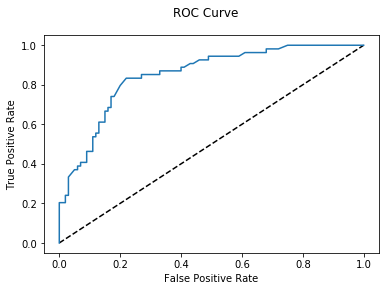

In [73]:
fig = plt.figure()
ax = fig.gca()
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
fig.suptitle('ROC Curve')
plt.show()

### Area under the ROC Curve 

In [86]:
from sklearn.metrics import roc_auc_score

In [87]:
print(roc_auc_score(y_test, y_pred_proba))

0.8499074074074073


<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">